In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
data = pd.read_csv('winequality.csv')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
fixed_acidity = data['fixed acidity'].values
volatile_acidity = data['volatile acidity'].values
citric_acid= data['citric acid'].values
residual_sugar = data['residual sugar'].values
chlorides = data['chlorides'].values
free_sulfur_dioxide = data['free sulfur dioxide'].values
total_sulfur_dioxide = data['total sulfur dioxide'].values
density = data['density'].values
pH = data['pH'].values
sulphates = data['sulphates'].values
alcohol = data['alcohol'].values
quality = data['quality'].values

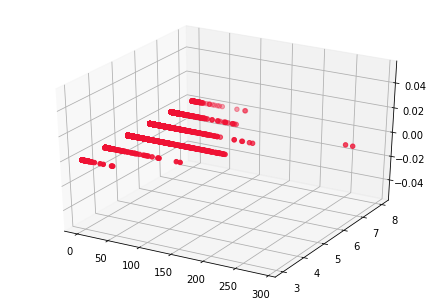

In [25]:
x_plot = [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]
y_plot = [quality, quality, quality, quality, quality, quality, quality, quality, quality, quality, quality]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_plot, y_plot, color='#ef1234')
plt.show()

In [21]:
m = len(chlorides)
x0 = np.ones(m)
x_final = [x0, fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]
X= np.array(x_final).T
B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Y = np.array(quality)
alpha = 0.0001

In [22]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [23]:
initial_cost = cost_function(X , Y, B)
print("Initial Cost:")
print(initial_cost)

Initial Cost:
16.20825515947467


In [26]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost_history[iteration] = cost_function(X, Y, B)
        
    return B, cost_history

In [27]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [28]:
print("New Coefficients:")
print(newB)

New Coefficients:
[ 0.08540986  0.08502574 -0.23428835  0.06340265 -0.00720521 -0.00431578
  0.00682569 -0.00255344  0.08450778  0.21805464  0.23757095  0.38485442]


In [30]:
print("Final Cost:")
print(cost_history[-1])

Final Cost:
0.23165538408912334


In [31]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt((sum((Y_pred - Y)** 2)) / len(Y))
    return rmse

In [32]:
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    ss_tot = sum((Y - np.mean(Y)) ** 2)
    ss_res = sum((Y- Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [33]:
Y_pred = X.dot(newB)

In [35]:
print("RMSE:")
print(rmse(Y, Y_pred))
print("R2 Score:")
print(r2_score(Y, Y_pred))

RMSE:
0.6806693530476048
R2 Score:
0.289139584457651
